In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df1 = pd.read_csv("Term Test-1-result.csv")
df2 = pd.read_csv("Term Test-2-result.csv")

In [3]:
df_merged = pd.merge(df1, df2, on=["Registration Number", "Name"])
print(df_merged)

    Registration Number                   Name  TT 1 Marks   TT 2 Marks
0                 21001          Salma Sultana         14.5        15.5
1                 21002          Tamjidul Miad          8.5        13.5
2                 21003        Debabrata Dhar          11.5        15.5
3                 21004           Sabiha Akter         13.0        15.0
4                 21005           Avishak Dhar         16.0        10.5
5                 21006         Syeda Sabrina          14.5        12.5
6                 21007          Mainul Islam          16.5        17.0
7                 21008            Syeda Israt         13.5         8.5
8                 21009     Tanvia Akter Prome          8.5        15.0
9                 21010   Md. Ohiduzzaman Anik         18.5        17.0
10                21011      Shahila Chowdhury         18.5        17.5
11                21012       Shawon Sutradhar         18.0        17.0
12                21013          Nur Mohammad          15.5     

In [4]:
df_merged.rename(columns={"TT 1 Marks ": "TT-1 Marks", "TT 2 Marks": "TT-2 Marks"}, inplace=True)
print(df_merged.columns)

Index(['Registration Number', 'Name', 'TT-1 Marks', 'TT-2 Marks'], dtype='object')


In [13]:
df_merged["Best Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].max(axis=1)
df_merged["Average Marks"] = df_merged[["TT-1 Marks", "TT-2 Marks"]].mean(axis=1)
print(df_merged)

    Registration Number                   Name  TT-1 Marks  TT-2 Marks  \
0                 21001          Salma Sultana        14.5        15.5   
1                 21002          Tamjidul Miad         8.5        13.5   
2                 21003        Debabrata Dhar         11.5        15.5   
3                 21004           Sabiha Akter        13.0        15.0   
4                 21005           Avishak Dhar        16.0        10.5   
5                 21006         Syeda Sabrina         14.5        12.5   
6                 21007          Mainul Islam         16.5        17.0   
7                 21008            Syeda Israt        13.5         8.5   
8                 21009     Tanvia Akter Prome         8.5        15.0   
9                 21010   Md. Ohiduzzaman Anik        18.5        17.0   
10                21011      Shahila Chowdhury        18.5        17.5   
11                21012       Shawon Sutradhar        18.0        17.0   
12                21013          Nur M

In [14]:
df_final = df_merged.drop(columns=["TT-1 Marks", "TT-2 Marks"])
print(df_final)

    Registration Number                   Name  Best Marks  Average Marks
0                 21001          Salma Sultana        15.5          15.00
1                 21002          Tamjidul Miad        13.5          11.00
2                 21003        Debabrata Dhar         15.5          13.50
3                 21004           Sabiha Akter        15.0          14.00
4                 21005           Avishak Dhar        16.0          13.25
5                 21006         Syeda Sabrina         14.5          13.50
6                 21007          Mainul Islam         17.0          16.75
7                 21008            Syeda Israt        13.5          11.00
8                 21009     Tanvia Akter Prome        15.0          11.75
9                 21010   Md. Ohiduzzaman Anik        18.5          17.75
10                21011      Shahila Chowdhury        18.5          18.00
11                21012       Shawon Sutradhar        18.0          17.50
12                21013          Nur M

In [15]:
df_final.to_csv("final_term_test_result.csv", index=False)

In [17]:
X = df_final[["Average Marks"]]
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_final["Cluster"] = kmeans.fit_predict(X)
print(df_final)

    Registration Number                   Name  Best Marks  Average Marks  \
0                 21001          Salma Sultana        15.5          15.00   
1                 21002          Tamjidul Miad        13.5          11.00   
2                 21003        Debabrata Dhar         15.5          13.50   
3                 21004           Sabiha Akter        15.0          14.00   
4                 21005           Avishak Dhar        16.0          13.25   
5                 21006         Syeda Sabrina         14.5          13.50   
6                 21007          Mainul Islam         17.0          16.75   
7                 21008            Syeda Israt        13.5          11.00   
8                 21009     Tanvia Akter Prome        15.0          11.75   
9                 21010   Md. Ohiduzzaman Anik        18.5          17.75   
10                21011      Shahila Chowdhury        18.5          18.00   
11                21012       Shawon Sutradhar        18.0          17.50   

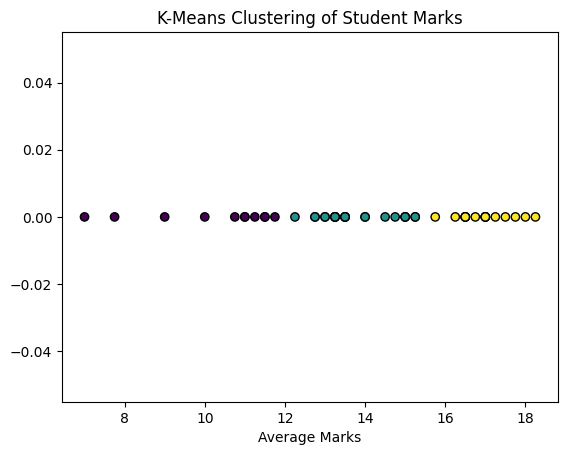

In [18]:
plt.scatter(df_final["Average Marks"], [0] * len(df_final), c=df_final["Cluster"], cmap='viridis', edgecolors='k')
plt.xlabel("Average Marks")
plt.title("K-Means Clustering of Student Marks")
plt.show()